# Projet 5 :

<FONT size="10pt" color='Blue'> <center>Segmentez des clients d'un site e-commerce</center></FONT>

### Importation des Bibliotheque

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from IPython.display import Markdown, display
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

### Présentation_des_Données (Data_Finale) la synthese de permiere notebook 

In [2]:
Data_Finale = pd .read_csv('Data_Final_cleaning_projet_5.csv')
Data_Finale.head(10)

,customer_unique_id,Delais_livraison_jours,en_retard,Delais_dernier_achat_jours,Nombre_de_Paiement,PrixCommandeMoyen,FraisDeLivraisonMoyen,ScoreCommentaireMoyen,Nombre_de_commande,CoutTotalAvecFraisDeLivraison,CoutTotalAvecFraisDeLivraison(log)
0,0000366f3b9a7992bf8c76cfdf3221e2,6,0,307,8,129.90,12.00,5,1,141.90,4.962145
1,0000b849f77a49e4a4ce2b2a4ca5be3f,3,0,310,1,18.90,8.29,4,1,27.19,3.338967
2,0000f46a3911fa3c0805444483337064,26,0,733,8,69.00,17.22,3,1,86.22,4.468434
3,0000f6ccb0745a6a4b88665a16c9f078,20,0,517,4,25.99,17.63,4,1,43.62,3.798182
4,0004aac84e0df4da2b147fca70cf8255,13,0,484,6,180.00,16.89,5,1,196.89,5.287711
5,0004bd2a26a76fe21f786e4fbd80607f,2,0,342,8,154.00,12.98,4,1,166.98,5.123845
6,00050ab1314c0e55a6ca13cf7181fecf,2,0,327,1,27.99,7.39,4,1,35.38,3.594019
7,00053a61a98854899e70ed204dd4bafe,16,0,378,3,191.00,18.59,1,2,209.59,5.349913
8,0005e1862207bf6ccc02e4228effd9a0,5,0,739,3,135.00,15.12,4,1,150.12,5.018074
9,0005ef4cd20d2893f0d9fbd94d3c0d97,54,1,366,4,104.90,24.86,1,1,129.76,4.873364


In [3]:
display(Markdown(f"- La dimension de la Table est : **{ Data_Finale.shape}**"))

- La dimension de la Table est : **(91484, 11)**

In [4]:
Data_Finale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91484 entries, 0 to 91483
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   customer_unique_id                  91484 non-null  object 
 1   Delais_livraison_jours              91484 non-null  int64  
 2   en_retard                           91484 non-null  int64  
 3   Delais_dernier_achat_jours          91484 non-null  int64  
 4   Nombre_de_Paiement                  91484 non-null  int64  
 5   PrixCommandeMoyen                   91484 non-null  float64
 6   FraisDeLivraisonMoyen               91484 non-null  float64
 7   ScoreCommentaireMoyen               91484 non-null  int64  
 8   Nombre_de_commande                  91484 non-null  int64  
 9   CoutTotalAvecFraisDeLivraison       91484 non-null  float64
 10  CoutTotalAvecFraisDeLivraison(log)  91484 non-null  float64
dtypes: float64(4), int64(6), object(1)
memory

In [5]:
Data_Finale.isna().sum()

customer_unique_id                    0
Delais_livraison_jours                0
en_retard                             0
Delais_dernier_achat_jours            0
Nombre_de_Paiement                    0
PrixCommandeMoyen                     0
FraisDeLivraisonMoyen                 0
ScoreCommentaireMoyen                 0
Nombre_de_commande                    0
CoutTotalAvecFraisDeLivraison         0
CoutTotalAvecFraisDeLivraison(log)    0
dtype: int64

- **Aucune colonne ne contient de valeur nulle.**

In [6]:
display(Markdown(f"- le nombres des Client doublant est: **{Data_Finale['customer_unique_id'].duplicated().sum()}**"))

- le nombres des Client doublant est: **0**

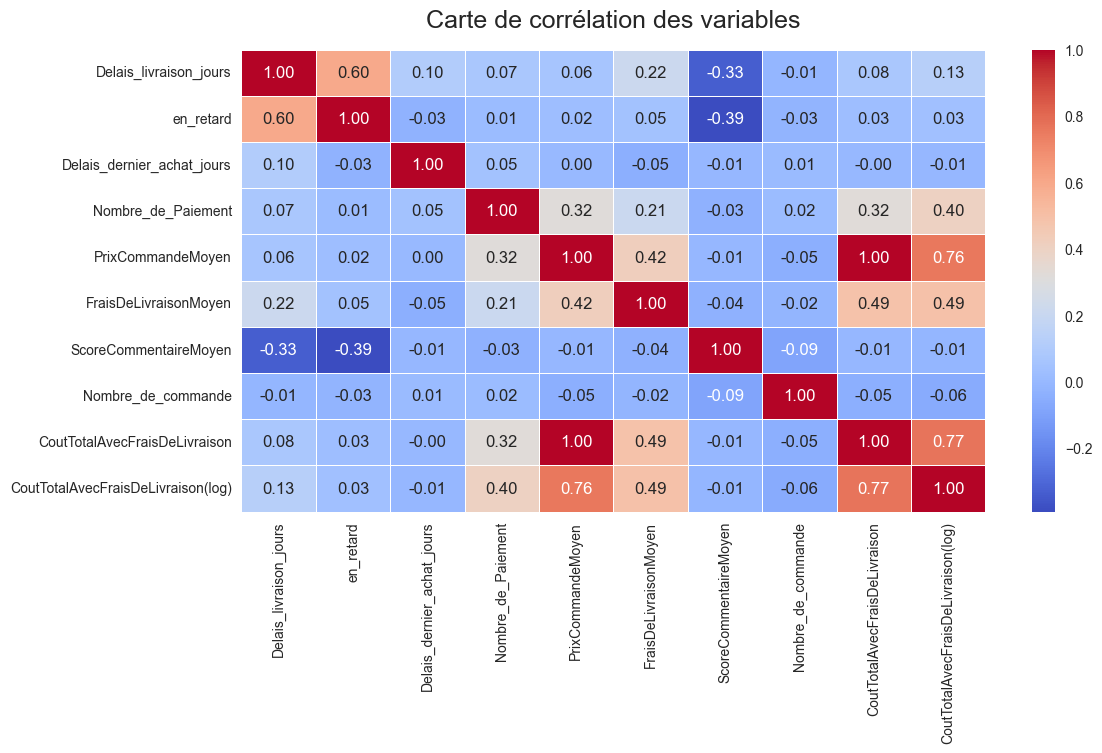

In [7]:
# Calculer la matrice de corrélation
correlation_matrix = Data_Finale.select_dtypes(include=['number']).corr()

# Création de la carte de chaleur pour la matrice de corrélation
plt.figure(figsize=(12, 6))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
heatmap.set_title('Carte de corrélation des variables', fontdict={'fontsize': 18}, pad=16)

# Affichage de la carte de chaleur
plt.show()

- **Par la suite, on va travailler sur une segmentation RFM, donc il est recommandé de ne pas supprimer les variables qui ont une forte corrélation.**

<FONT size="5pt" color='red'> <center>On redéfinit l'objectif de la mission pour bien tracer le chemin de travail.</center></FONT>

- **<span style="color:blue">L'objectif de la mission est de segmenter les clients du site Olist, et cette segmentation peut être utilisée au quotidien pour leurs campagnes de communication. Il s'agit de comprendre les différents types d'utilisateurs grâce à leur comportement et aux données personnelles collectées lors de leurs visites et commandes sur le site web Olist.<span>**

In [8]:
# Normaliser les données pour le clustering
features = Data_Finale.columns[1:]  # Exclure l'ID client
scaler = StandardScaler()
donnees_scaled = scaler.fit_transform(Data_Finale[features])

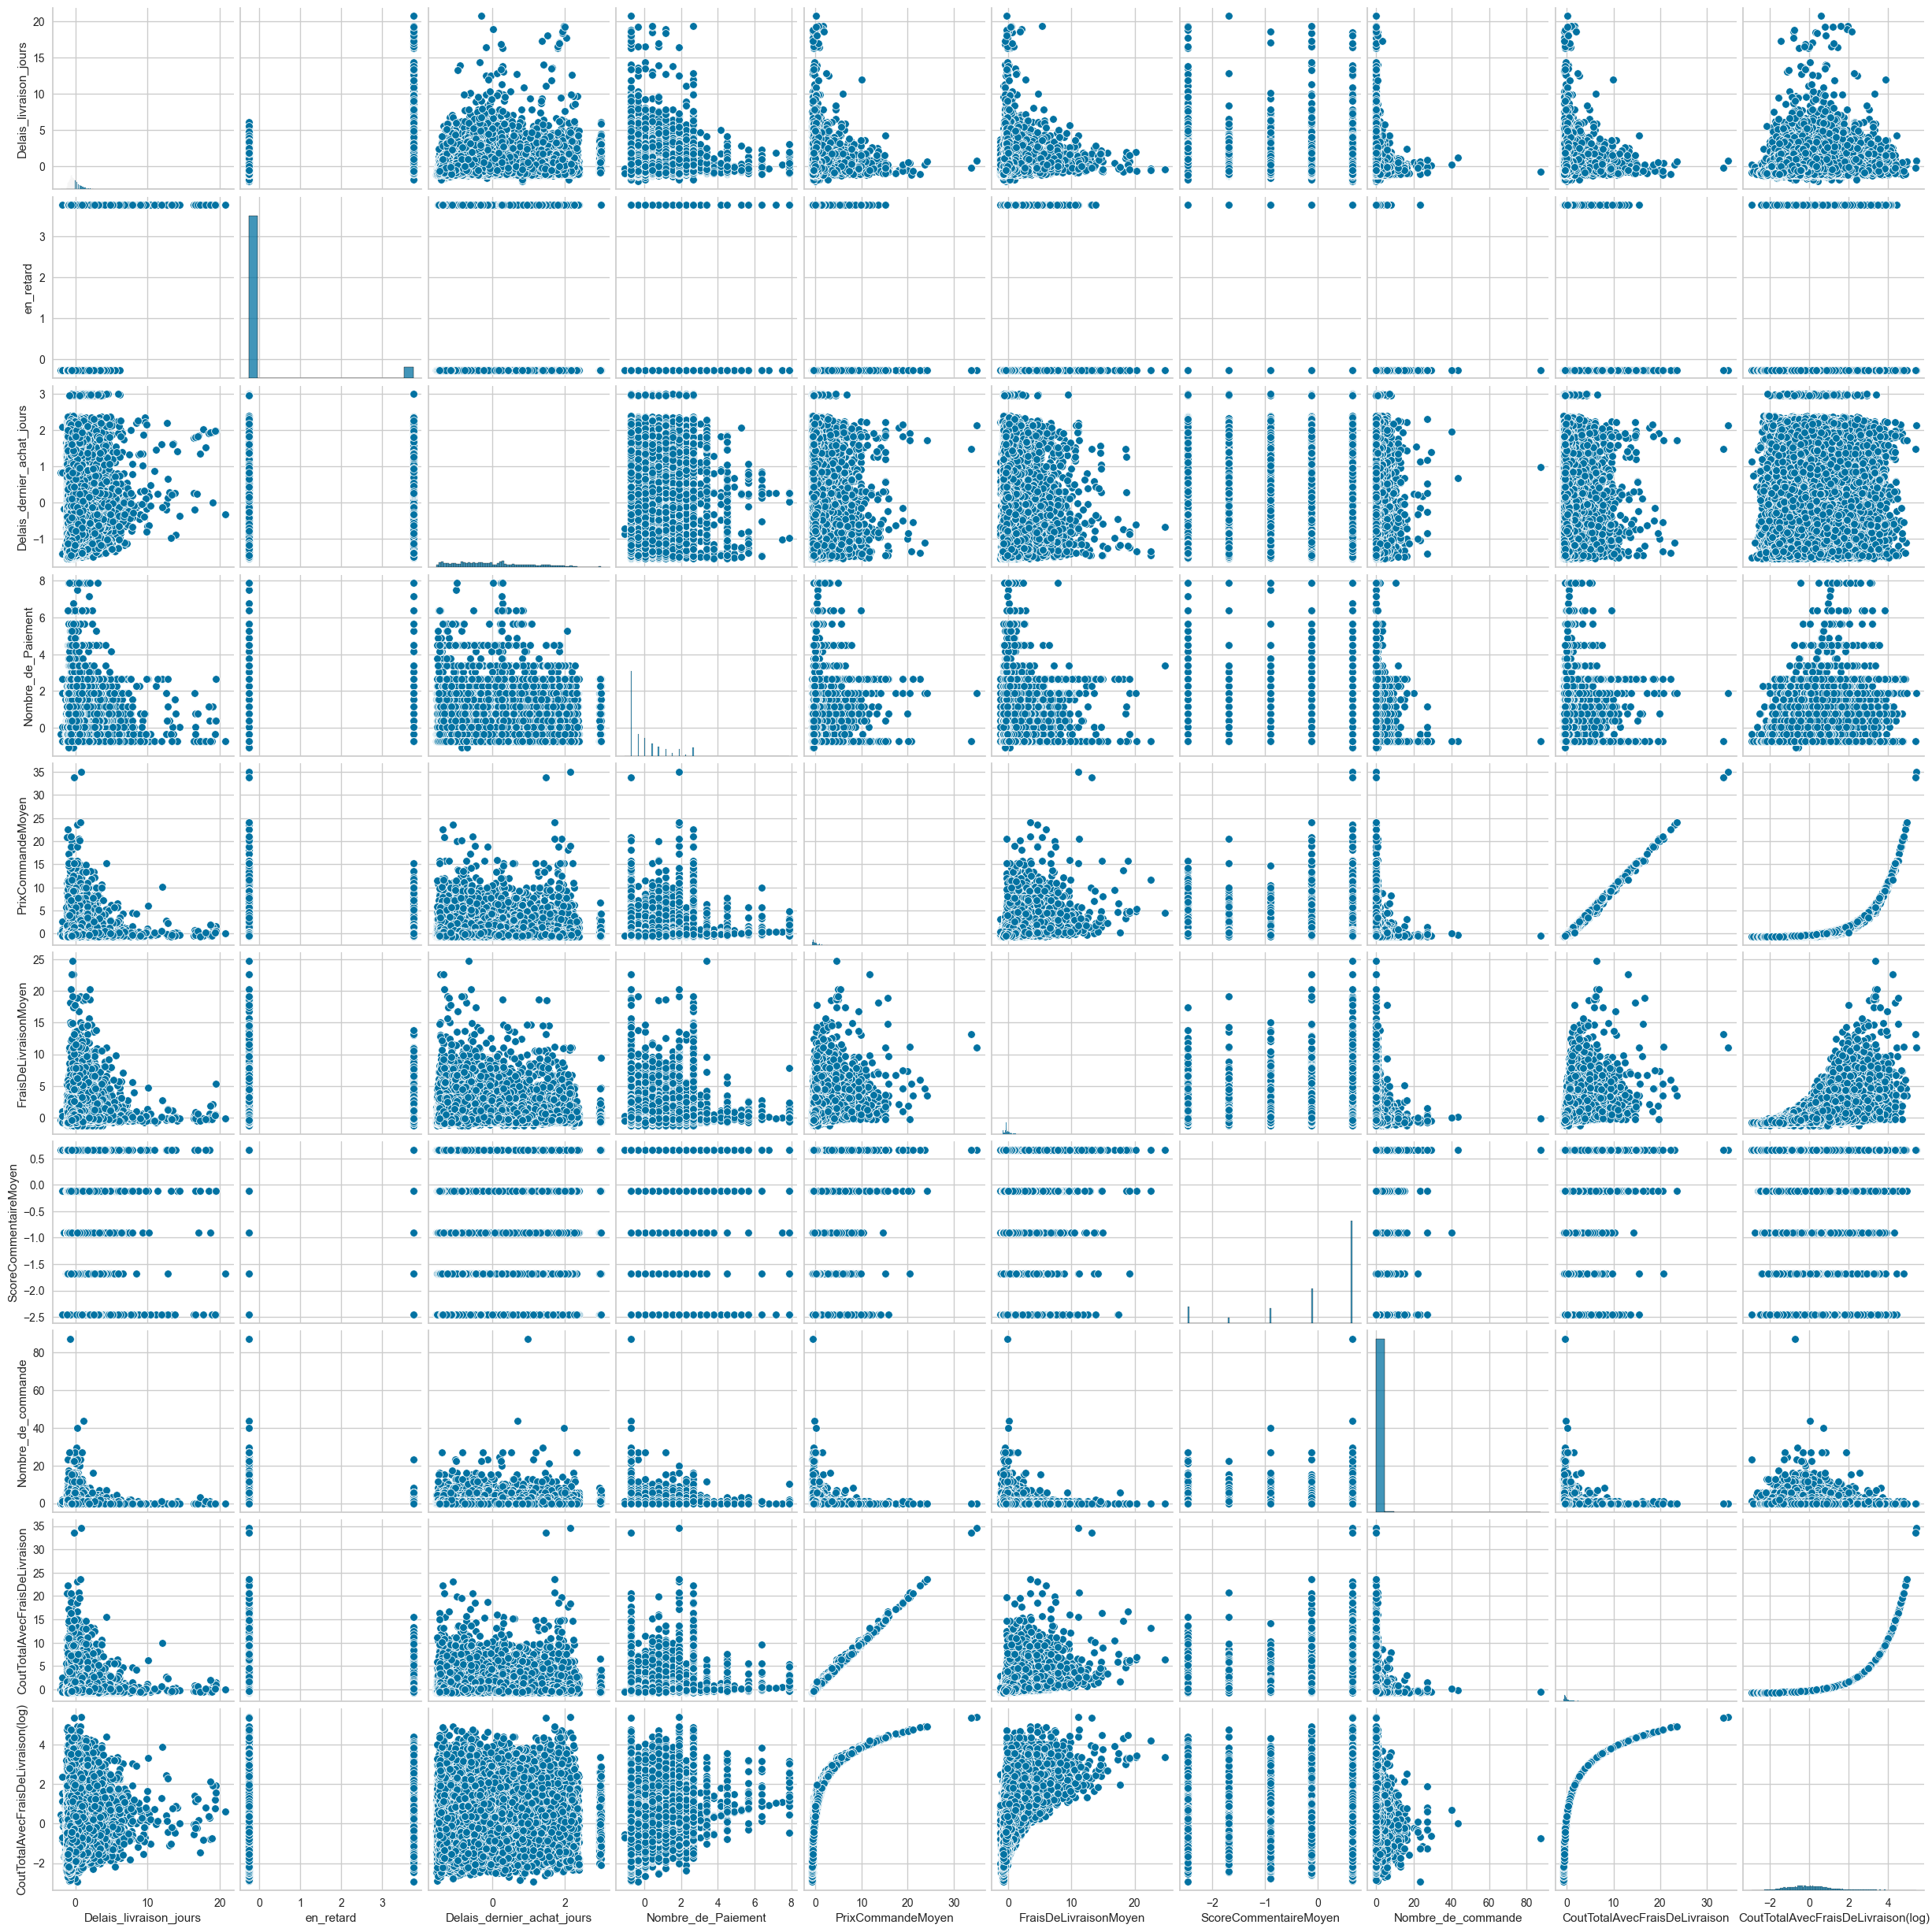

In [9]:
# Visualiser les données
sns.pairplot(pd.DataFrame(donnees_scaled, columns=features))
plt.show()

<FONT size="5pt" color='red'> <center>Que nécessite la segmentation RFM ?</center></FONT>

- **La segmentation RFM prend en compte la Récence (date de la dernière commande), la Fréquence des commandes et le Montant (de la dernière commande ou sur une période donnée) pour établir des segments de clients homogènes.**

## Déclaration des fonctions

- **Toutes les fonctions que nous voulons utiliser sont définies afin d’être flexibles et efficaces dans la suite de notre segmentation.**

In [10]:
def min_max_scaler(dataframe):
    """
    Fonction pour normaliser les données en utilisant la méthode Min-Max Scaling.
    Les valeurs de chaque colonne du dataframe seront mises à l'échelle entre 0 et 1.

    Paramètres:
    dataframe (pd.DataFrame): Le dataframe contenant les données à normaliser.

    Retourne:
    pd.DataFrame: Un nouveau dataframe avec les valeurs normalisées.
    """

    # Initialisation du scaler MinMaxScaler
    scaler = MinMaxScaler()

    # fit transforme les données pour s'adapter aux valeurs minimales et maximales
    scaled_data = scaler.fit_transform(dataframe)

    # Conversion des données transformées en dataframe
    scaled_dataframe = pd.DataFrame(scaled_data, columns=dataframe.columns)

    # Retour du dataframe normalisé
    return scaled_dataframe

In [11]:
def standardize_data(dataframe):
    """
    Fonction pour standardiser les données en utilisant la méthode de standardisation.
    Les valeurs de chaque colonne du dataframe seront centrées autour de 0 et auront un écart-type de 1.

    Paramètres:
    dataframe (pd.DataFrame): Le dataframe contenant les données à standardiser.

    Retourne:
    pd.DataFrame: Un nouveau dataframe avec les valeurs standardisées.
    """

    # Initialisation du StandardScaler
    scaler = StandardScaler()

    # Ajustement du scaler sur les données
    scaler.fit(dataframe)

    # Transformation des données
    scaled_data = scaler.transform(dataframe)

    # Conversion des données transformées en dataframe
    scaled_dataframe = pd.DataFrame(scaled_data, columns=dataframe.columns)

    # Retour du dataframe standardisé
    return scaled_dataframe

In [12]:
def apply_pca(scaled_dataframe, variance_ratio=0.8):
    """
    Fonction pour appliquer l'analyse en composantes principales (ACP) sur les données standardisées.
    La réduction de dimension est réalisée de manière à conserver un pourcentage spécifié de la variance totale.

    Paramètres:
    scaled_dataframe (pd.DataFrame): Le dataframe contenant les données standardisées.
    variance_ratio (float): Le pourcentage de variance à conserver lors de la réduction de dimension. Par défaut, 0.8 (80%).

    Retourne:
    pd.DataFrame: Un nouveau dataframe avec les composantes principales nommées selon les variables d'origine.
    PCA: L'objet PCA ajusté sur les données.
    """

    # Initialisation de l'objet PCA avec le ratio de variance souhaité
    pca = PCA(n_components=variance_ratio)

    # Ajustement du modèle PCA sur les données et transformation
    pca_transformed_data = pca.fit_transform(scaled_dataframe)

    # Extraire les coefficients (loadings) des composantes principales
    loadings = pd.DataFrame(pca.components_, columns=scaled_dataframe.columns)
    
    # Nommer les colonnes du dataframe transformé avec les noms des variables d'origine
    pca_dataframe = pd.DataFrame(pca_transformed_data, columns=[f'Composante_{i+1}' for i in range(pca_transformed_data.shape[1])])
    
    # Retour du dataframe des composantes principales et de l'objet PCA
    return pca_dataframe, pca, loadings

In [13]:
def plot_scree(model, data):
    """
    Fonction pour tracer un graphique des valeurs propres (scree plot) à partir d'un modèle PCA.
    Le graphique montre le pourcentage de variance expliqué par chaque composante principale et la variance cumulée.

    Paramètres:
    model (PCA): Le modèle PCA ajusté sur les données.
    data (pd.DataFrame): Le dataframe original contenant les données avant transformation PCA.

    Retourne:
    Aucun. Affiche un graphique des valeurs propres.
    """

    # Calculer le pourcentage de variance expliqué par chaque composante principale
    explained_variance_ratio = (model.explained_variance_ratio_ * 100).round(2)
    
    # Calculer la variance cumulée
    cumulative_variance_ratio = explained_variance_ratio.cumsum().round(2)
    
    # Générer une liste d'indices pour les composantes principales
    component_indices = np.arange(1, len(explained_variance_ratio) + 1)

    # Création de la figure et de la taille du graphique
    plt.figure(figsize=(10, 6))

    # Tracer le pourcentage de variance expliqué par chaque composante principale
    plt.bar(component_indices, explained_variance_ratio, alpha=0.7, label='Variance expliquée par composante')
    
    # Tracer la courbe de la variance cumulée
    plt.plot(component_indices, cumulative_variance_ratio, color='red', marker='o', label='Variance cumulée')

    # Ajouter les labels et le titre
    plt.xlabel("Rang de l'axe d'inertie")
    plt.ylabel("Pourcentage d'inertie")
    plt.title("Éboulis des valeurs propres")

    # Ajouter une légende
    plt.legend()

    # Afficher le graphique
    plt.show()

In [14]:
def plot_correlation_circle(model, dataframe):
    """
    Fonction pour tracer le cercle des corrélations à partir d'un modèle PCA.
    Ce graphique montre les relations entre les variables d'origine et les composantes principales.

    Paramètres:
    model (PCA): Le modèle PCA ajusté sur les données.
    dataframe (pd.DataFrame): Le dataframe original contenant les données avant transformation PCA.

    Retourne:
    pd.DataFrame: Un dataframe contenant les composantes principales et leurs coefficients.
    """
    
    # Obtenir les noms des variables originales
    features = dataframe.columns

    # Obtenir les composantes principales du modèle
    pcs = pd.DataFrame(model.components_, columns=features)
    pcs.index = [f"F{i+1}" for i in range(len(pcs))]

    # Paires de composantes principales à tracer
    axes_pairs = [(0, 1), (2, 3), (4, 5)]
    
    for x, y in axes_pairs:
        if x >= len(pcs) or y >= len(pcs):
            continue  # Ignorer les paires qui dépassent le nombre de composantes disponibles

        # Création de la figure pour le cercle de corrélations
        fig, ax = plt.subplots(figsize=(7, 7))

        # Tracer les vecteurs pour chaque variable
        for i in range(model.components_.shape[1]):
            ax.arrow(0, 0, model.components_[x, i], model.components_[y, i], 
                     head_width=0.05, head_length=0.05, fc='blue', ec='blue')
            plt.text(model.components_[x, i] * 1.1, model.components_[y, i] * 1.1, features[i], color='red', ha='center', va='center')

        # Tracer les lignes horizontales et verticales
        plt.plot([-1, 1], [0, 0], color='grey', ls='--')
        plt.plot([0, 0], [-1, 1], color='grey', ls='--')

        # Ajouter des étiquettes aux axes avec le pourcentage d'inertie expliqué
        plt.xlabel(f'F{x+1} ({round(100 * model.explained_variance_ratio_[x], 1)}%)')
        plt.ylabel(f'F{y+1} ({round(100 * model.explained_variance_ratio_[y], 1)}%)')

        # Ajouter un titre
        plt.title(f"Cercle des corrélations (F{x+1} et F{y+1})")

        # Ajouter un cercle unitaire pour l'échelle
        angle = np.linspace(0, 2 * np.pi, 100)
        plt.plot(np.cos(angle), np.sin(angle), color='black')
        plt.axis('equal')

        # Afficher le graphique
        plt.show()

    # Retourner le dataframe des composantes principales arrondi à deux décimales
    return pcs.round(2)

In [15]:
def plot_elbow_method(scaled_data):
    """
    Fonction pour tracer le graphique de la méthode du coude (elbow method) pour déterminer le nombre optimal de clusters.
    Utilise le visualiseur KElbowVisualizer de la bibliothèque Yellowbrick.

    Paramètres:
    scaled_data (pd.DataFrame): Le dataframe contenant les données standardisées.

    Retourne:
    int: La valeur optimale de k (nombre de clusters) selon la méthode du coude.
    """
    
    # Initialisation du modèle KMeans
    kmeans_model = KMeans(random_state=42, n_init=10)
    
    # Initialisation du visualiseur KElbowVisualizer pour trouver le nombre optimal de clusters
    elbow_visualizer = KElbowVisualizer(kmeans_model, k=(10))
    
    # Ajustement du visualiseur sur les données
    elbow_visualizer.fit(scaled_data)
    
    # Affichage du graphique de la méthode du coude
    elbow_visualizer.show()
    
    # Retourner la valeur optimale de k selon la méthode du coude
    return elbow_visualizer.elbow_value_

In [16]:
def plot_silhouette_analysis(scaled_data):                   #, n_clusters
    """
    Fonction pour tracer le graphique de l'analyse de silhouette pour évaluer la qualité des clusters.
    Utilise le visualiseur SilhouetteVisualizer de la bibliothèque Yellowbrick.

    Paramètres:
    scaled_data (pd.DataFrame): Le dataframe contenant les données standardisées.
    n_clusters (int): Le nombre de clusters à utiliser pour l'analyse de silhouette.

    Retourne:
    Aucun. Affiche un graphique de l'analyse de silhouette.
    """
    
    # Initialisation du modèle KMeans avec le nombre de clusters spécifié
    kmeans_model = KMeans(n_clusters, random_state=42, n_init=10)    # =n_clusters
    
    # Initialisation du visualiseur SilhouetteVisualizer
    silhouette_visualizer = SilhouetteVisualizer(kmeans_model)
    
    # Ajustement du visualiseur sur les données
    silhouette_visualizer.fit(scaled_data)
    
    # Affichage du graphique de l'analyse de silhouette
    silhouette_visualizer.show()  

In [17]:
def perform_kmeans_clustering(scaled_data, n_clusters):
    """
    Fonction pour appliquer l'algorithme K-Means sur les données standardisées et obtenir les clusters.
    
    Paramètres:
    scaled_data (pd.DataFrame): Le dataframe contenant les données standardisées.
    n_clusters (int): Le nombre de clusters à utiliser pour l'algorithme K-Means.

    Retourne:
    tuple: Un tuple contenant les étiquettes des clusters pour chaque point de données et le modèle KMeans ajusté.
    """
    
    # Initialisation du modèle KMeans avec le nombre de clusters spécifié
    kmeans_model = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    
    # Ajustement du modèle sur les données et prédiction des clusters
    cluster_labels = kmeans_model.fit_predict(scaled_data)
    
    # Retourner les étiquettes des clusters et le modèle KMeans ajusté
    return cluster_labels, kmeans_model

In [18]:
def get_centroids(kmeans_model):
    """
    Fonction pour obtenir les coordonnées des centroïdes des clusters à partir d'un modèle KMeans ajusté.
    
    Paramètres:
    kmeans_model (KMeans): Le modèle KMeans ajusté sur les données.

    Retourne:
    pd.DataFrame: Un dataframe contenant les coordonnées des centroïdes des clusters.
    """
    
    # Obtenir les coordonnées des centroïdes des clusters
    centroids = kmeans_model.cluster_centers_
    
    # Conversion des coordonnées des centroïdes en dataframe
    centroids_df = pd.DataFrame(centroids)
    
    # Retourner le dataframe des centroïdes
    return centroids_df

In [19]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

def perform_tukey_test(dataframe):
    """
    Fonction pour effectuer le test de Tukey HSD sur les groupes de clusters.
    
    Paramètres:
    dataframe (pd.DataFrame): Le dataframe contenant les données avec une colonne 'KMeans' indiquant les clusters.

    Retourne:
    SimpleTable: Le tableau de résultats du test de Tukey HSD.
    """
    
    # Création de listes pour les valeurs et les groupes
    values, groups = [], []

    # Itération sur chaque cluster unique dans la colonne 'KMeans'
    for cluster in dataframe['KMeans'].unique():
        # Itération sur chaque liste de valeurs dans le cluster
        for row_values in dataframe[dataframe['KMeans'] == cluster].iloc[:, :-1].values.tolist():
            for value in row_values:
                values.append(value)
                groups.append(cluster)

    # Création d'un dictionnaire pour les valeurs et les groupes
    data_dict = {'Values': values, 'Groups': groups}
    
    # Conversion du dictionnaire en dataframe
    df = pd.DataFrame(data_dict)
    
    # Effectuer le test de Tukey HSD
    tukey_results = pairwise_tukeyhsd(df["Values"], df["Groups"])
    
    # Retourner le tableau des résultats du test de Tukey HSD
    return tukey_results.summary()

In [20]:
def plot_radar_chart_1(data):
    """
    Fonction pour tracer un graphique radar pour visualiser les caractéristiques moyennes des groupes de clients après clustering KMeans.
    
    Paramètres:
    data (pd.DataFrame): Le dataframe contenant les données avec une colonne 'KMeans' indiquant les clusters.

    Retourne:
    Aucun. Affiche un graphique radar des caractéristiques moyennes des groupes de clients.
    """
    # Vérifiez que la colonne 'KMeans' existe
    if 'KMeans' not in data.columns:
        raise KeyError("La colonne 'KMeans' n'existe pas dans le DataFrame")

    # Créer une copie du dataframe
    df_copy = data.copy()
    
    # GroupBy sur les clusters KMeans et calcul de la moyenne des caractéristiques pour chaque cluster
    cluster_counts = df_copy['KMeans'].value_counts()
    cluster_means = df_copy.groupby('KMeans').mean()
    
    # Fusionner les données de moyenne avec le nombre de clients par cluster
    cluster_stats = pd.merge(cluster_means, cluster_counts, right_index=True, left_index=True)
    cluster_stats.rename(columns={0: 'NbClients'}, inplace=True)
    
    # Liste des variables pour le graphique radar
    variables = list(cluster_stats.columns[:-1])
    variables.append(variables[0])

    # Préparer les données pour le graphique radar
    stats_transposed = cluster_stats.T
    stats_transposed = stats_transposed.iloc[:-1]  # Exclure 'NbClients'
    stats_transposed = pd.concat([stats_transposed, stats_transposed.iloc[0:1]], ignore_index=True)
    label_placement = np.linspace(start=0, stop=2 * np.pi, num=len(variables))

    # Créer le graphique radar
    plt.figure(figsize=(10, 8))
    ax = plt.subplot(polar=True)
    
    for i in range(len(cluster_stats)):
        row = stats_transposed.iloc[:, i].values
        ax.plot(label_placement, row, label=cluster_stats.index[i])
        ax.fill(label_placement, row, alpha=0.3)
    
    # Ajouter les étiquettes aux axes
    ax.set_xticks(label_placement)
    ax.set_xticklabels(variables)
    
    # Ajouter une légende
    plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
    
    # Afficher le graphique
    plt.show()

In [21]:
# DEUXIEMME PARTI ESSAIS OK

def plot_radar_chart(data):
    """
    Fonction pour tracer un graphique radar pour visualiser les caractéristiques moyennes des groupes de clients après clustering KMeans.
    
    Paramètres:
    data (pd.DataFrame): Le dataframe contenant les données avec une colonne 'KMeans' indiquant les clusters.

    Retourne:
    Aucun. Affiche un graphique radar des caractéristiques moyennes des groupes de clients.
    """
    # Vérifiez que la colonne 'KMeans' existe
    if 'KMeans' not in data.columns:
        raise KeyError("La colonne 'KMeans' n'existe pas dans le DataFrame")

    # Créer une copie du dataframe
    df_copy = data.copy()
    
    # GroupBy sur les clusters KMeans et calcul de la moyenne des caractéristiques pour chaque cluster
    cluster_counts = df_copy['KMeans'].value_counts()
    cluster_means = df_copy.groupby('KMeans').mean()
    
    # Fusionner les données de moyenne avec le nombre de clients par cluster
    cluster_stats = pd.merge(cluster_means, cluster_counts, right_index=True, left_index=True)
    cluster_stats.rename(columns={0: 'NbClients'}, inplace=True)

    # Renommer les groupes en fonction de critères spécifiques
    def NameGroupe(value):
        DicoGroupeName = {}
        DicoGroupeName[cluster_stats.sort_values('Nombre_de_commande', ascending=False).index[0]] = 'Meilleur acheteur/nbre commande',  #Meilleur acheteur par nombre de commande
        DicoGroupeName[cluster_stats.sort_values('CoutTotalAvecFraisDeLivraison(log)', ascending=False).index[0]] = 'Meilleur acheteur/cout global'
        DicoGroupeName[cluster_stats.sort_values('ScoreCommentaireMoyen', ascending=True).index[0]] = 'Acheteurs mécontents'
        DicoGroupeName[cluster_stats.sort_values('Delais_dernier_achat_jours', ascending=False).index[0]] = 'Acheteurs les plus lointains'
        DicoGroupeName[cluster_stats.sort_values('Delais_dernier_achat_jours', ascending=True).index[0]] = 'Acheteurs les plus récents'
        DicoGroupeName[cluster_stats.sort_values('Retard_livraison_jours', ascending=False).index[0]] = 'Acheteurs à retards de livraison',  #Acheteurs avec le plus de retards de livraison
        DicoGroupeName[cluster_stats.sort_values('Nombre_de_Paiement', ascending=False).index[0]] = 'Acheteurs à paiement élevé' #Acheteurs avec le plus de paiements
        return DicoGroupeName.get(value, value)

    cluster_stats = cluster_stats.reset_index()
    cluster_stats['index'] = cluster_stats['index'].apply(NameGroupe)
    cluster_stats = cluster_stats.set_index('index')

    # Liste des variables pour le graphique radar
    variables = list(cluster_stats.columns[:-1])
    variables.append(variables[0])

    # Préparer les données pour le graphique radar
    stats_transposed = cluster_stats.T
    stats_transposed = stats_transposed.iloc[:-1]  # Exclure 'NbClients'
    stats_transposed = pd.concat([stats_transposed, stats_transposed.iloc[0:1]], ignore_index=True)
    label_placement = np.linspace(start=0, stop=2 * np.pi, num=len(variables))

    # Créer le graphique radar
    plt.figure(figsize=(10, 8))
    ax = plt.subplot(polar=True)
    
    for i in range(len(cluster_stats)):
        row = stats_transposed.iloc[:, i].values
        ax.plot(label_placement, row, label=cluster_stats.index[i])
        ax.fill(label_placement, row, alpha=0.3)
    
    # Ajouter les étiquettes aux axes
    ax.set_xticks(label_placement)
    ax.set_xticklabels(variables)
    
    # Ajouter une légende
    plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
    
    # Afficher le graphique
    plt.show()

In [22]:
def plot_group_statistics_1(data):
    """
    Fonction pour tracer des graphiques des statistiques moyennes des groupes de clients après clustering KMeans.
    
    Paramètres:
    data (pd.DataFrame): Le dataframe contenant les données avec une colonne 'KMeans' indiquant les clusters.

    Retourne:
    Aucun. Affiche des graphiques des caractéristiques moyennes des groupes de clients.
    """
    
    # Compter le nombre de clients dans chaque cluster
    cluster_counts = data['KMeans'].value_counts()
    
    # Calculer les moyennes des caractéristiques pour chaque cluster
    cluster_means = data.groupby('KMeans').mean()
    
    # Fusionner les données de moyenne avec le nombre de clients par cluster
    group_stats = pd.merge(cluster_means, cluster_counts, right_index=True, left_index=True)
    group_stats.rename(columns={'KMeans': 'NbClients/Groupes'}, inplace=True)
    
    # Renommer les groupes si le dataframe a 4 colonnes (spécifique à ce cas d'utilisation)
    if len(data.columns) == 4:
        def rename_group(value):
            group_names = {}
            group_names[group_stats.sort_values('Nombre_de_commande', ascending=False).index[0]] = 'Meilleur acheteur/nbre commande',  #Meilleur acheteur par nombre de commande
            group_names[group_stats.sort_values('CoutTotalAvecFraisDeLivraison', ascending=False).index[0]] = 'Meilleur acheteur/cout global'
            group_names[group_stats.sort_values('ScoreCommentaireMoyen', ascending=True).index[0]] = 'Acheteurs mécontents'
            group_names[group_stats.sort_values('Delais_dernier_achat_jours', ascending=False).index[0]] = 'Acheteurs les plus lointains'
            group_names[group_stats.sort_values('Delais_dernier_achat_jours', ascending=True).index[0]] = 'Acheteurs les plus récents'
            return group_names[value]

        group_stats = group_stats.reset_index()
        group_stats['KMeans'] = group_stats['KMeans'].apply(rename_group)
        group_stats = group_stats.set_index('KMeans')

    # Définir les zones pour les sous-graphiques
    zones = [(4, 3, i+1) for i in range(len(group_stats.columns))]
    columns = group_stats.columns

    # Créer la figure pour les graphiques
    fig = plt.figure(figsize=(20, 20))
    
    for column, zone in zip(columns, zones):
        plt.subplot(zone[0], zone[1], zone[2])
        ax = sns.barplot(x=group_stats.index, y=group_stats[column].values)
        ax.bar_label(ax.containers[0], padding=4)
        plt.title(column)
        plt.xticks(rotation=75)
        plt.subplots_adjust(hspace=1.2)
        plt.xlabel('')
        ax.margins(y=0.5)
    
    # Afficher les graphiques
    plt.show()

In [23]:
# DEUXIEMME PARTI ESSAIS OK

def plot_group_statistics(data):
    """
    Fonction pour tracer des graphiques des statistiques moyennes des groupes de clients après clustering KMeans.
    
    Paramètres:
    data (pd.DataFrame): Le dataframe contenant les données avec une colonne 'KMeans' indiquant les clusters.

    Retourne:
    Aucun. Affiche des graphiques des caractéristiques moyennes des groupes de clients.
    """
    
    # Compter le nombre de clients dans chaque cluster
    cluster_counts = data['KMeans'].value_counts()
    
    # Calculer les moyennes des caractéristiques pour chaque cluster
    cluster_means = data.groupby('KMeans').mean()
    
    # Fusionner les données de moyenne avec le nombre de clients par cluster
    group_stats = pd.merge(cluster_means, cluster_counts, right_index=True, left_index=True)
    group_stats.rename(columns={'KMeans': 'NbClients/Groupes'}, inplace=True)
    
    # Définir les noms des groupes
    group_names = {
        group_stats.sort_values('Nombre_de_commande', ascending=False).index[0]: 'Meilleur acheteur/nbre commande',  #Meilleur acheteur par nombre de commande
        group_stats.sort_values('CoutTotalAvecFraisDeLivraison', ascending=False).index[0]: 'Meilleur acheteur/cout global',
        group_stats.sort_values('ScoreCommentaireMoyen', ascending=True).index[0]: 'Acheteurs mécontents',
        group_stats.sort_values('Delais_dernier_achat_jours', ascending=False).index[0]: 'Acheteurs les plus lointains',
        group_stats.sort_values('Delais_dernier_achat_jours', ascending=True).index[0]: 'Acheteurs les plus récents',
        group_stats.sort_values('Retard_livraison_jours', ascending=False).index[0]: 'Acheteurs à retards de livraison',  #Acheteurs avec le plus de retards de livraison
        group_stats.sort_values('Nombre_de_Paiement', ascending=False).index[0]: 'Acheteurs à paiement élevé' #Acheteurs avec le plus de paiements
    }
    
    # Renommer les indices du DataFrame
    group_stats = group_stats.rename(index=group_names)
    
    # Définir les zones pour les sous-graphiques
    zones = [(4, 3, i+1) for i in range(len(group_stats.columns))]
    columns = group_stats.columns

    # Créer la figure pour les graphiques
    fig = plt.figure(figsize=(20, 20))
    
    for column, zone in zip(columns, zones):
        plt.subplot(zone[0], zone[1], zone[2])
        ax = sns.barplot(x=group_stats.index, y=group_stats[column].values)
        ax.bar_label(ax.containers[0], padding=4)
        plt.title(column)
        plt.xticks(rotation=75, ha='right')
        plt.subplots_adjust(hspace=1.2)
        plt.xlabel('')
        ax.margins(y=0.5)
    
    # Afficher les graphiques
    plt.show()

In [24]:
def plot_boxplots(standardized_data, sample_size=1000):
    """
    Fonction pour tracer des boxplots des données standardisées pour chaque cluster KMeans.
    
    Paramètres:
    standardized_data (pd.DataFrame): Le dataframe contenant les données standardisées avec une colonne 'KMeans' indiquant les clusters.
    sample_size (int): Le nombre de lignes à échantillonner pour la visualisation.
    
    Retourne:
    Aucun. Affiche des boxplots des caractéristiques par cluster.
    """
    
    start_time = time.time()
    
    # Prendre un échantillon des données
    if len(standardized_data) > sample_size:
        standardized_data = standardized_data.sample(n=sample_size, random_state=42)
    
    # Définir les zones pour les sous-graphique
    num_columns = len(standardized_data.columns) - 1
    zones = [(4, 3, i+1) for i in range(num_columns)]
    columns = standardized_data.columns[:-1]

    # Créer la figure pour les boxplots
    fig = plt.figure(figsize=(20, 20))
    
    for column, zone in zip(columns, zones):
        plt.subplot(zone[0], zone[1], zone[2])
        sns.boxplot(x=standardized_data['KMeans'], y=standardized_data[column])
        plt.title(column)
        plt.xlabel('KMeans Cluster')
        plt.ylabel(column)
        plt.subplots_adjust(hspace=0.4, wspace=0.4)
    
    # Afficher les boxplots
    plt.show()
    
    print("Temps d'exécution: %s secondes" % (time.time() - start_time))

In [25]:
def plot_pairplot(data):
    """
    Fonction pour tracer un pairplot des caractéristiques des groupes de clients après clustering KMeans.
    
    Paramètres:
    data (pd.DataFrame): Le dataframe contenant les données avec une colonne 'KMeans' indiquant les clusters.

    Retourne:
    Aucun. Affiche un pairplot des caractéristiques des groupes de clients.
    """
    
    # Tracer le pairplot avec les couleurs des clusters définies par 'KMeans'
    sns.pairplot(data, hue='KMeans', palette='Dark2')
    
    # Afficher le graphique
    plt.show() 

<FONT size="4pt" color='orange'> <center>D'après nos données, et pour effectuer une segmentation RFM (Récence d'achat, Fréquence, Montant), il faut que notre dataset contienne les colonnes suivantes : Delais_dernier_achat_jours, Nombre_de_commande, CoutTotalAvecFraisDeLivraison. Nous réalisons donc une première segmentation en nous basant sur ces colonnes.</center></FONT>

### Segmentation avec les variables les plus pertinentes pour RFM 

In [26]:
# Créer une copie de toutes les colonnes sauf la dernière de Data_Final
DF = Data_Finale.iloc[:,:-1].copy()

In [27]:
# Sélectionner les colonnes pertinentes
selected_columns = Data_Finale[['Delais_dernier_achat_jours', 'Nombre_de_commande', 'CoutTotalAvecFraisDeLivraison']]

In [28]:
# Appliquer la fonction min_max_scaler aux colonnes sélectionnées
normalized_data = min_max_scaler(selected_columns)
normalized_data.head()

,Delais_dernier_achat_jours,Nombre_de_commande,CoutTotalAvecFraisDeLivraison
0,0.159712,0.0,0.019156
1,0.164029,0.0,0.002579
2,0.772662,0.0,0.011110
3,0.461871,0.0,0.004954
4,0.414388,0.0,0.027103


In [29]:
# Appliquer la fonction min_max_scaler aux colonnes sélectionnées
standardized_data = standardize_data(selected_columns)
standardized_data.head()

,Delais_dernier_achat_jours,Nombre_de_commande,CoutTotalAvecFraisDeLivraison
0,-0.823368,-0.281349,-0.020461
1,-0.803709,-0.281349,-0.606025
2,1.968301,-0.281349,-0.304693
3,0.552807,-0.281349,-0.522154
4,0.336551,-0.281349,0.260248


Taille de la DataFrame au départ : (91484, 3)
Taille de la DataFrame après PCA : (91484, 3)
Explication de la variance par composante : [0.34855057 0.33332018 0.31812925]


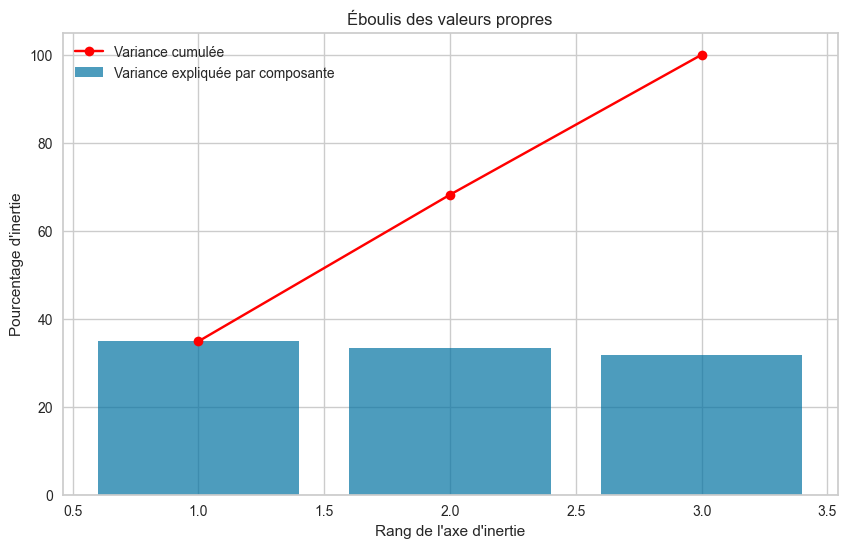

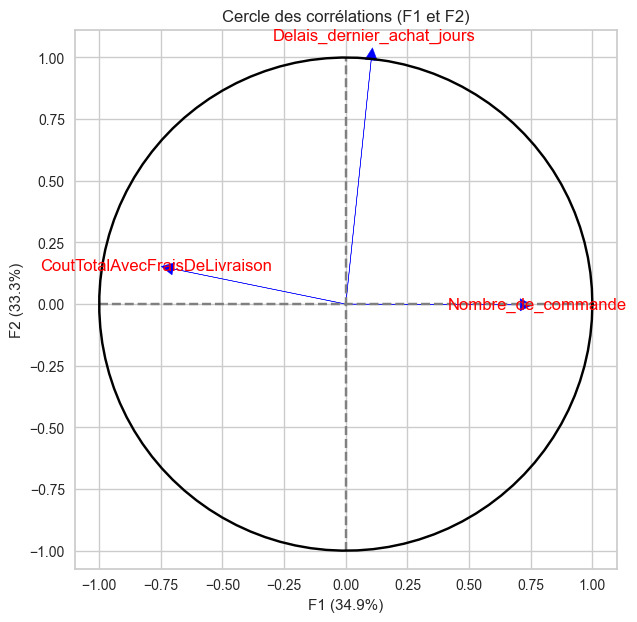

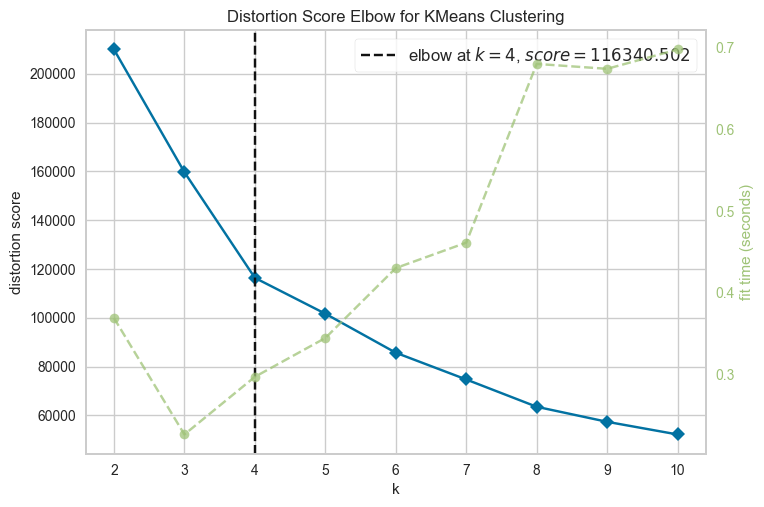

In [ ]:
# Affichage de la taille initiale du DataFrame standardisé
print('Taille de la DataFrame au départ :', standardized_data.shape)

# Application de la PCA (analyse en composantes principales) sur les données standardisées
X_pca = apply_pca(standardized_data)
pca_dataframe_named, pca_model_named, loadings_named = apply_pca(standardized_data)
print('Taille de la DataFrame après PCA :', X_pca[0].shape)
print('Explication de la variance par composante :', X_pca[1].explained_variance_ratio_)

# Tracé du graphique Scree pour visualiser l'explication de la variance par chaque composante principale
plot_scree(pca_model_named, standardized_data)

# Tracé du cercle des corrélations pour visualiser les contributions des variables originales aux composantes principales
plot_correlation_circle(pca_model_named, standardized_data)

# Détermination du nombre optimal de clusters en utilisant la méthode du coude
n_clusters = plot_elbow_method(X_pca[0])

# Tracé du graphique de l'analyse de silhouette pour évaluer la qualité des clusters
plot_silhouette_analysis(X_pca[0])

# Exécution du clustering KMeans sur les données PCA
Values = perform_kmeans_clustering(X_pca[0], n_clusters)

# Ajout des étiquettes de clusters au DataFrame original et au DataFrame standardisé
DF['KMeans'] = Values[0]
standardized_data['KMeans'] = Values[0]

# Affichage des centroides des clusters
get_centroids(Values[1])

# Affichage des résultats du test statistique de Tukey
print('Résultats du test statistique de Tukey :')
print(perform_tukey_test(standardized_data))

# Tracé du graphique radar pour comparer les différents groupes
print('Graphique radar de comparaison des groupes :')
plot_radar_chart_1(standardized_data)

# Affichage des statistiques des variables par groupes
print('Résultats des variables par groupes :')
print(plot_group_statistics_1(DF))

# Tracé des boxplots pour un échantillon de 10000 éléments
print('Tracé des boxplots :')
print(plot_boxplots(DF, sample_size=1000))

# Tracé du pairplot pour visualiser les différentes relations entre variables par groupes
print('Visualisation en pairplot des différents groupes :')
plot_pairplot(standardized_data)

In [31]:
# Créer une copie de toutes les colonnes sauf la dernière de Data_Final
DF = Data_Finale.iloc[:,:-1].copy()

In [32]:
# Sélectionner les colonnes pertinentes
selected_columns_ = Data_Finale[['Delais_dernier_achat_jours', 'en_retard', 'Nombre_de_Paiement', 
                                'Nombre_de_commande', 'CoutTotalAvecFraisDeLivraison(log)', 'ScoreCommentaireMoyen']]   

# , 'Retard_livraison_jours', 'Nombre_de_Paiement'

In [33]:
# Appliquer la fonction min_max_scaler aux colonnes sélectionnées
standardized_data = standardize_data(selected_columns_)
standardized_data.head()

,Delais_dernier_achat_jours,en_retard,Nombre_de_Paiement,Nombre_de_commande,CoutTotalAvecFraisDeLivraison(log),ScoreCommentaireMoyen
0,-0.823368,-0.264837,1.906071,-0.281349,0.431922,0.663004
1,-0.803709,-0.264837,-0.707844,-0.281349,-1.650530,-0.117326
2,1.968301,-0.264837,1.906071,-0.281349,-0.201484,-0.897656
3,0.552807,-0.264837,0.412405,-0.281349,-1.061381,-0.117326
4,0.336551,-0.264837,1.159238,-0.281349,0.849606,0.663004


Taille de la DataFrame au départ : (91484, 6)
Taille de la DataFrame après PCA : (91484, 4)
Explication de la variance par composante : [0.24040634 0.22723178 0.17189908 0.16446261]


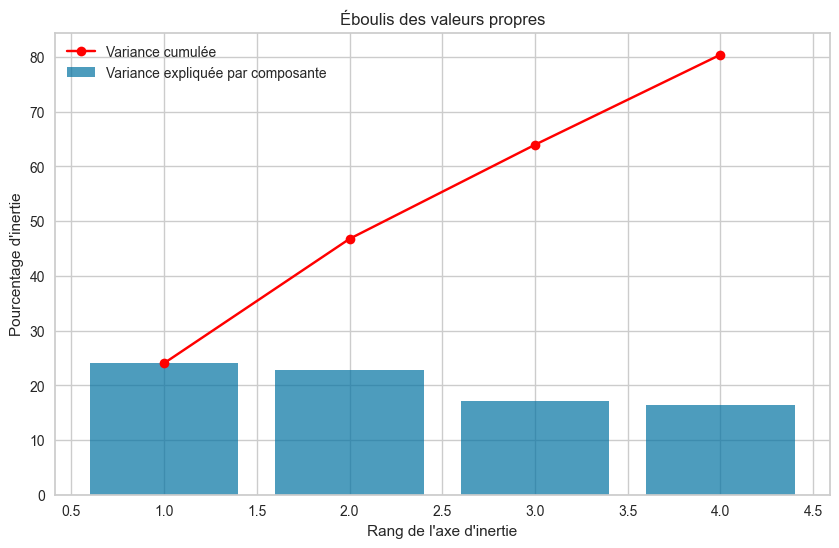

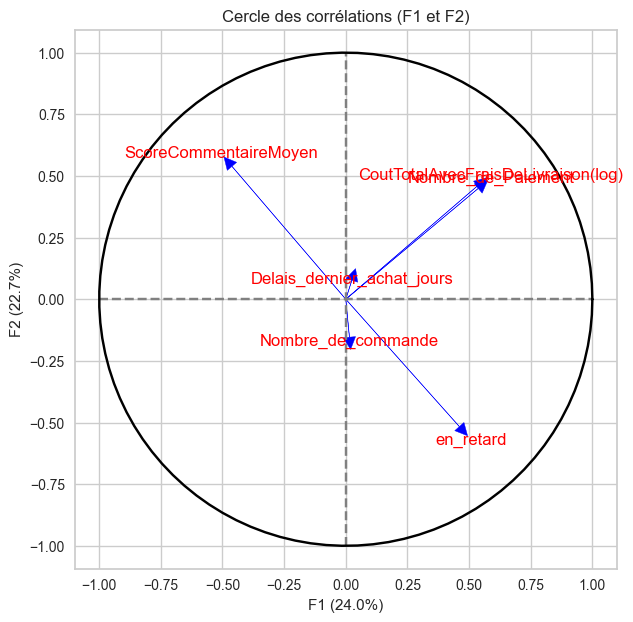

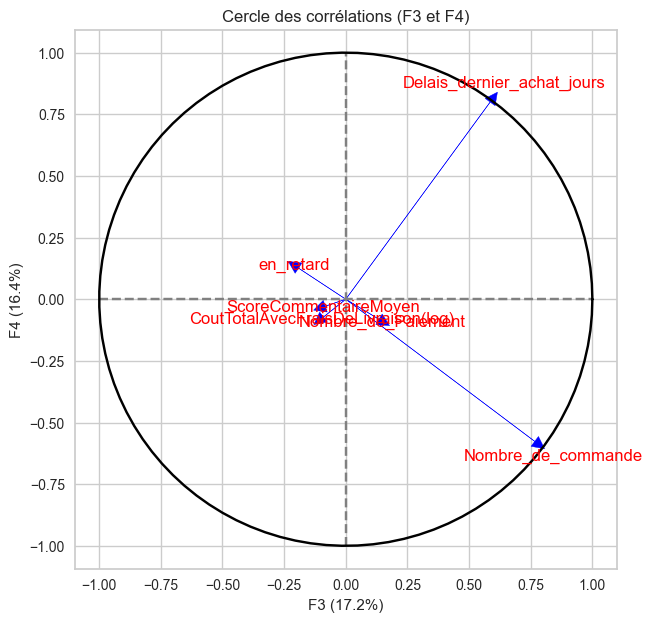

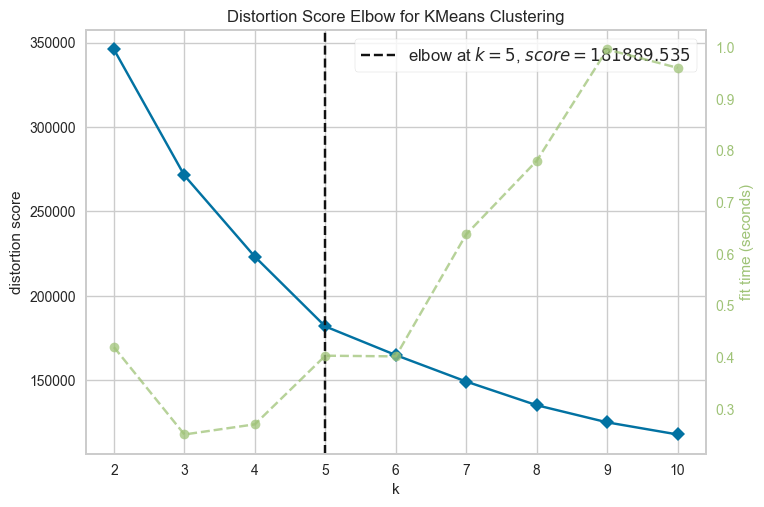

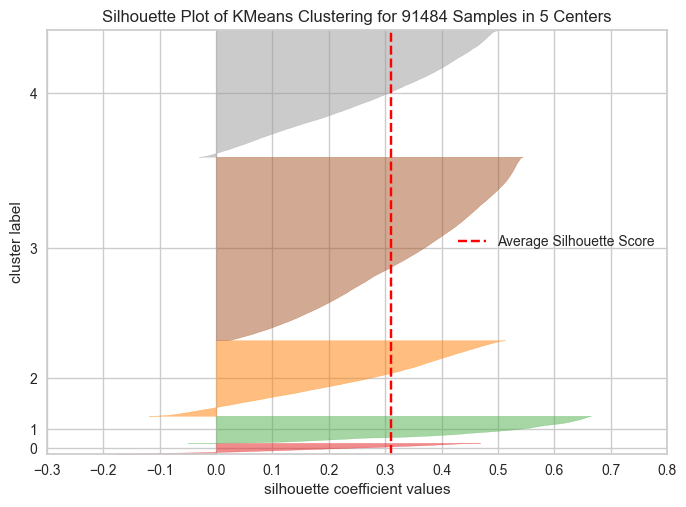

Résultats du test statistique de Tukey :
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     0      1  -0.1761   0.0 -0.2023 -0.1498   True
     0      2   -0.121   0.0 -0.1447 -0.0972   True
     0      3  -0.7955   0.0 -0.8183 -0.7726   True
     0      4  -0.5144   0.0 -0.5375 -0.4912   True
     1      2   0.0551   0.0  0.0388  0.0714   True
     1      3  -0.6194   0.0 -0.6344 -0.6044   True
     1      4  -0.3383   0.0 -0.3537 -0.3229   True
     2      3  -0.6745   0.0 -0.6845 -0.6646   True
     2      4  -0.3934   0.0  -0.404 -0.3828   True
     3      4   0.2811   0.0  0.2727  0.2895   True
---------------------------------------------------
Graphique radar de comparaison des groupes :


KeyError: 'index'

In [34]:
# Affichage de la taille initiale du DataFrame standardisé
print('Taille de la DataFrame au départ :', standardized_data.shape)

# Application de la PCA (analyse en composantes principales) sur les données standardisées
X_pca = apply_pca(standardized_data)
pca_dataframe_named, pca_model_named, loadings_named = apply_pca(standardized_data)
print('Taille de la DataFrame après PCA :', X_pca[0].shape)
print('Explication de la variance par composante :', X_pca[1].explained_variance_ratio_)

# Tracé du graphique Scree pour visualiser l'explication de la variance par chaque composante principale
plot_scree(pca_model_named, standardized_data)

# Tracé du cercle des corrélations pour visualiser les contributions des variables originales aux composantes principales
plot_correlation_circle(pca_model_named, standardized_data)

# Détermination du nombre optimal de clusters en utilisant la méthode du coude
n_clusters = plot_elbow_method(X_pca[0])

# Tracé du graphique de l'analyse de silhouette pour évaluer la qualité des clusters
plot_silhouette_analysis(X_pca[0])

# Exécution du clustering KMeans sur les données PCA
Values = perform_kmeans_clustering(X_pca[0], n_clusters)

# Ajout des étiquettes de clusters au DataFrame original et au DataFrame standardisé
DF['KMeans'] = Values[0]
standardized_data['KMeans'] = Values[0]

# Affichage des centroides des clusters
get_centroids(Values[1])

# Affichage des résultats du test statistique de Tukey
print('Résultats du test statistique de Tukey :')
print(perform_tukey_test(standardized_data))

# Tracé du graphique radar pour comparer les différents groupes
print('Graphique radar de comparaison des groupes :')
plot_radar_chart(standardized_data)

# Affichage des statistiques des variables par groupes
print('Résultats des variables par groupes :')
print(plot_group_statistics(DF))

# Tracé des boxplots pour un échantillon de 10000 éléments
print('Tracé des boxplots :')
print(plot_boxplots(DF, sample_size=1000))

# Tracé du pairplot pour visualiser les différentes relations entre variables par groupes
print('Visualisation en pairplot des différents groupes :')
plot_pairplot(standardized_data)

### Essai des autres algorithme de Clustring

In [36]:
# Sélection aléatoire d'une sous-matrice :
sampled_data = Data_Finale[['Delais_dernier_achat_jours', 'en_retard', 'Nombre_de_Paiement', 
                           'Nombre_de_commande', 'CoutTotalAvecFraisDeLivraison(log)', 
                           'ScoreCommentaireMoyen']].sample(n=10000, random_state=42)

In [37]:
from sklearn.preprocessing import StandardScaler

# Standardisation des données
scaler = StandardScaler()
standardized_data = scaler.fit_transform(sampled_data)

In [38]:
# Définition de la fonction de visualisation des clusters
def plot_clusters(data, labels, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k')
    plt.title(title)
    plt.xlabel(data.columns[0])
    plt.ylabel(data.columns[1])
    plt.colorbar()
    plt.show()

- **DBSCAN Clustering**
DBSCAN (Density-Based Spatial Clustering of Applications with Noise) est un algorithme de clustering basé sur la densité qui identifie des régions denses en points de données et les regroupe en clusters. 

In [39]:
from sklearn.cluster import DBSCAN

# Initialisation et ajustement de l'algorithme de clustering DBSCAN
dbscan_clustering = DBSCAN(eps=3, min_samples=100)
dbscan_clustering.fit(standardized_data)

# Récupération des étiquettes de clusters
dbscan_labels = dbscan_clustering.labels_

# Visualisation des clusters pour DBSCAN Clustering
#plot_clusters(sampled_data, dbscan_labels, 'DBSCAN Clustering')

- **Agglomerative Clustering**
Agglomerative Clustering est un algorithme de clustering hiérarchique qui construit une hiérarchie de clusters en suivant une approche de fusion ascendante.

In [40]:
from sklearn.cluster import AgglomerativeClustering

# Initialisation et ajustement de l'algorithme de clustering agglomératif
agg_clustering = AgglomerativeClustering()
agg_clustering.fit(standardized_data)

# Récupération des étiquettes de clusters
agg_labels = agg_clustering.labels_

# Visualisation des clusters pour Agglomerative Clustering
#plot_clusters(sampled_data, agg_labels, 'Agglomerative Clustering')

- **Spectral Clustering**

Spectral Clustering est un algorithme de clustering basé sur les propriétés du spectre (les valeurs propres) de la matrice de similarité des donnée**

In [49]:
from sklearn.cluster import SpectralClustering

# Initialisation et ajustement de l'algorithme de clustering Spectral
spectral_clustering = SpectralClustering(n_clusters=5, random_state=42)
spectral_clustering.fit(standardized_data)

# Récupération des étiquettes de clusters
spectral_labels = spectral_clustering.labels_

# Visualisation des clusters pour Spectral Clustering
#plot_clusters(sampled_data, spectral_labels, 'Spectral Clustering')

C:\Users\huawie\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


- **Gaussian Mixture Model (GMM)**

Gaussian Mixture Model (GMM) est un algorithme de clustering probabiliste qui modélise les données comme une combinaison de plusieurs distributions gaussiennes.

In [41]:
from sklearn.mixture import GaussianMixture

# Initialisation et ajustement de l'algorithme GMM
gmm_clustering = GaussianMixture(n_components=5, random_state=42)
gmm_clustering.fit(standardized_data)

# Récupération des étiquettes de clusters
gmm_labels = gmm_clustering.predict(standardized_data)

# Visualisation des clusters pour GMM Clustering
#plot_clusters(sampled_data, gmm_labels, 'Gaussian Mixture Model Clustering')

In [43]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Calcul et affichage des métriques pour chaque algorithme
def evaluate_clusters(data, labels, algorithm_name):
    silhouette_avg = silhouette_score(data, labels)
    davies_bouldin_avg = davies_bouldin_score(data, labels)
    print(f"{algorithm_name} - Silhouette Score: {silhouette_avg}, Davies-Bouldin Index: {davies_bouldin_avg}")

# Évaluation des clusters pour DBSCAN Clustering
evaluate_clusters(standardized_data, dbscan_labels, 'DBSCAN Clustering')

# Évaluation des clusters pour Agglomerative Clustering
evaluate_clusters(standardized_data, agg_labels, 'Agglomerative Clustering')

# Évaluation des clusters pour GMM Clustering
evaluate_clusters(standardized_data, gmm_labels, 'GMM Clustering')

DBSCAN Clustering - Silhouette Score: 0.478639947889238, Davies-Bouldin Index: 0.8479166409386343
Agglomerative Clustering - Silhouette Score: 0.4746454845014573, Davies-Bouldin Index: 0.9283635908833703
GMM Clustering - Silhouette Score: 0.14459482442629298, Davies-Bouldin Index: 2.162549158912526


- **- Ajustement des Paramètres de DBSCAN**

In [44]:
from sklearn.decomposition import PCA

# Réduction dimensionnelle avec PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(standardized_data)

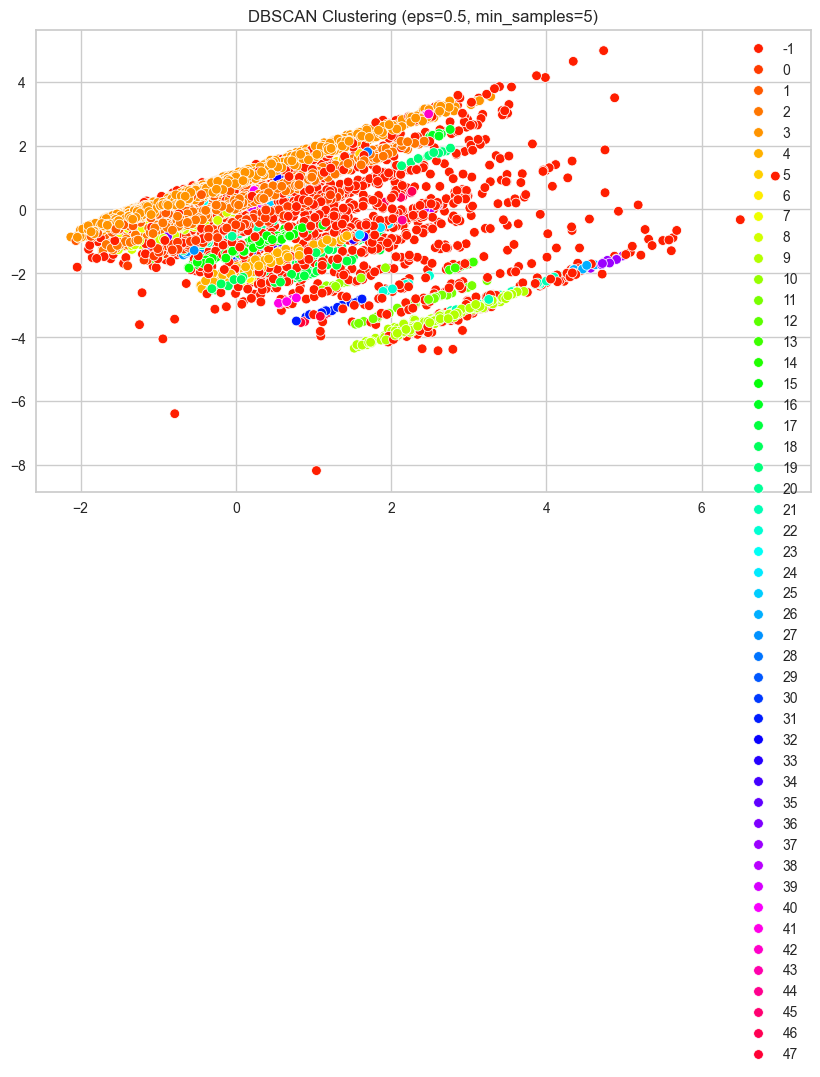

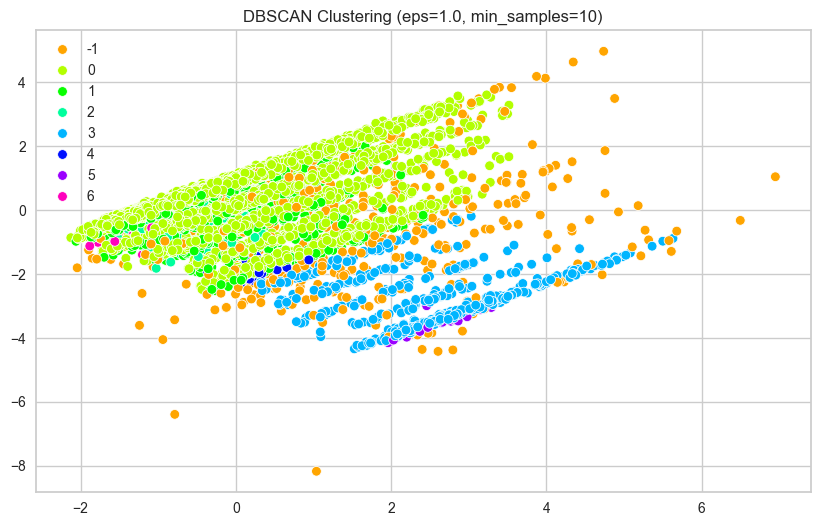

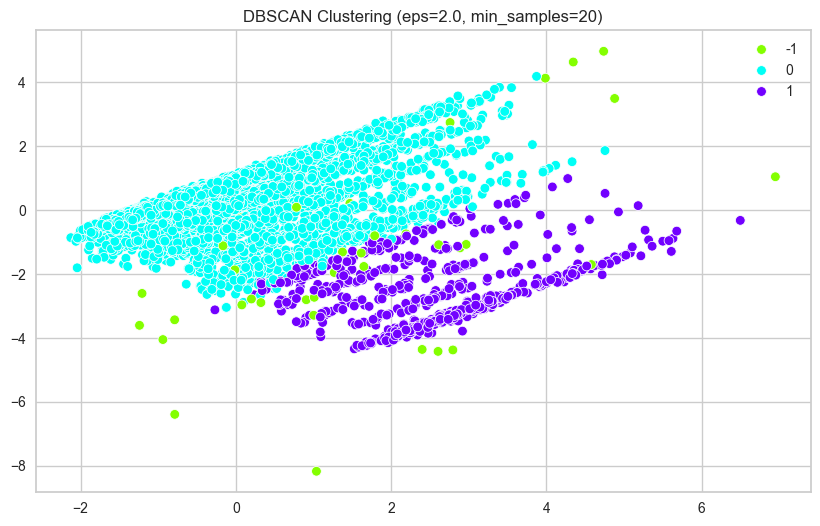

In [45]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

# Fonction pour ajuster DBSCAN avec différents paramètres et visualiser les résultats
def tune_dbscan(eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan.fit(standardized_data)
    labels = dbscan.labels_
    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        x=pca_data[:, 0], y=pca_data[:, 1],
        hue=labels,
        palette=sns.color_palette('hsv', len(np.unique(labels))),
        legend='full'
    )
    plt.title(f'DBSCAN Clustering (eps={eps}, min_samples={min_samples})')
    plt.show()
    
    return labels

# Exemple avec différents paramètres
labels_dbscan_1 = tune_dbscan(eps=0.5, min_samples=5)
labels_dbscan_2 = tune_dbscan(eps=1.0, min_samples=10)
labels_dbscan_3 = tune_dbscan(eps=2.0, min_samples=20)

C:\Users\huawie\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


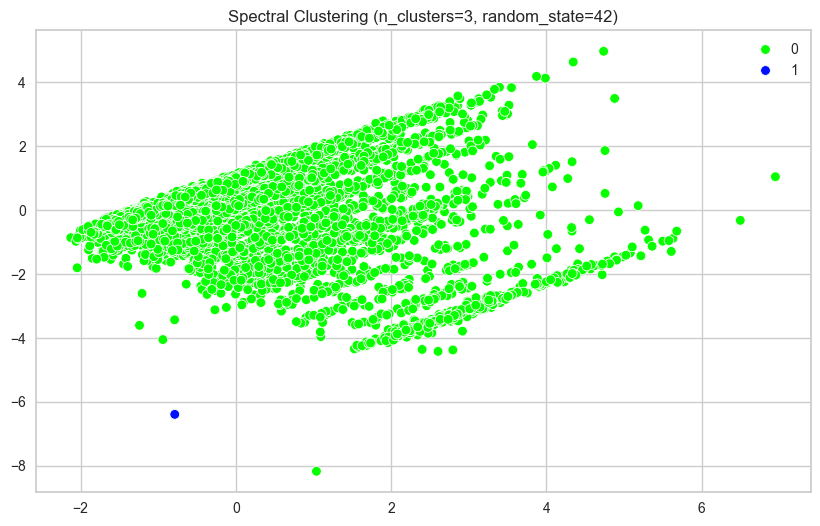

C:\Users\huawie\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


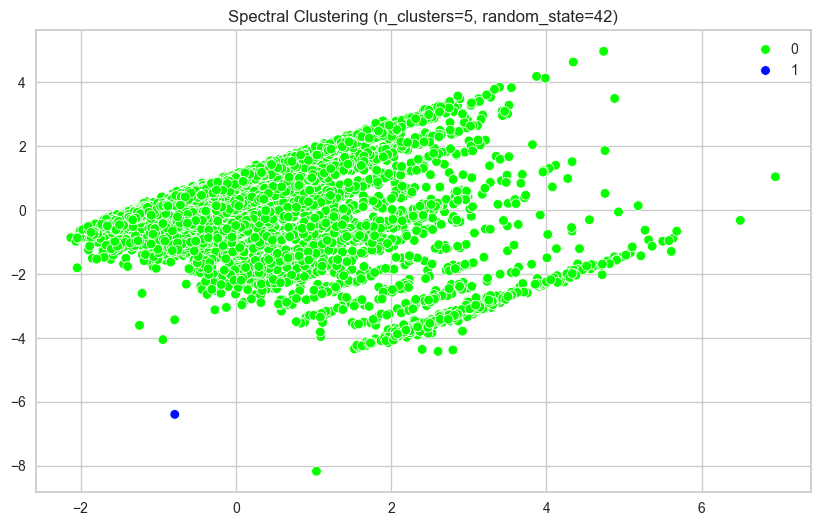

C:\Users\huawie\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


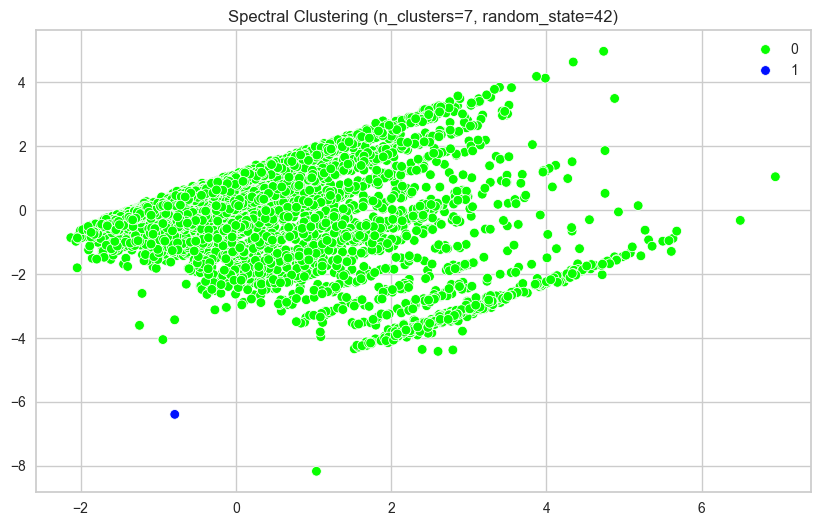

In [50]:
# Réduction dimensionnelle avec PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(standardized_data)

# Fonction pour ajuster Spectral Clustering avec différents paramètres et visualiser les résultats
def tune_spectral_clustering(n_clusters, random_state):
    spectral_clustering = SpectralClustering(n_clusters=n_clusters, random_state=random_state)
    spectral_labels = spectral_clustering.fit_predict(standardized_data)
    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        x=pca_data[:, 0], y=pca_data[:, 1],
        hue=spectral_labels,
        palette=sns.color_palette('hsv', len(np.unique(spectral_labels))),
        legend='full'
    )
    plt.title(f'Spectral Clustering (n_clusters={n_clusters}, random_state={random_state})')
    plt.show()
    
    return spectral_labels

# Exemple avec différents paramètres
labels_spectral_1 = tune_spectral_clustering(n_clusters=3, random_state=42)
labels_spectral_2 = tune_spectral_clustering(n_clusters=5, random_state=42)
labels_spectral_3 = tune_spectral_clustering(n_clusters=7, random_state=42)

In [51]:
# Fonction pour évaluer les clusters
def evaluate_clusters(data, labels, algorithm_name):
    silhouette_avg = silhouette_score(data, labels)
    davies_bouldin_avg = davies_bouldin_score(data, labels)
    print(f"{algorithm_name} - Silhouette Score: {silhouette_avg}, Davies-Bouldin Index: {davies_bouldin_avg}")

# Évaluation des clusters pour DBSCAN avec différents paramètres
evaluate_clusters(standardized_data, labels_dbscan_1, 'DBSCAN (eps=0.5, min_samples=5)')
evaluate_clusters(standardized_data, labels_dbscan_2, 'DBSCAN (eps=1.0, min_samples=10)')
evaluate_clusters(standardized_data, labels_dbscan_3, 'DBSCAN (eps=2.0, min_samples=20)')

# Évaluation des clusters pour Spectral Clustering avec différents paramètres
evaluate_clusters(standardized_data, labels_spectral_1, 'Spectral Clustering (n_clusters=3)')
evaluate_clusters(standardized_data, labels_spectral_2, 'Spectral Clustering (n_clusters=5)')
evaluate_clusters(standardized_data, labels_spectral_3, 'Spectral Clustering (n_clusters=7)')

DBSCAN (eps=0.5, min_samples=5) - Silhouette Score: -0.18702332725611354, Davies-Bouldin Index: 1.6870883676941606
DBSCAN (eps=1.0, min_samples=10) - Silhouette Score: 0.06533426219606718, Davies-Bouldin Index: 2.265372159741851
DBSCAN (eps=2.0, min_samples=20) - Silhouette Score: 0.4783976039995035, Davies-Bouldin Index: 0.9268896540068337
Spectral Clustering (n_clusters=3) - Silhouette Score: 0.9269781705101772, Davies-Bouldin Index: 0.05081310995907254
Spectral Clustering (n_clusters=5) - Silhouette Score: 0.9269781705101772, Davies-Bouldin Index: 0.05081310995907254
Spectral Clustering (n_clusters=7) - Silhouette Score: 0.9269781705101772, Davies-Bouldin Index: 0.05081310995907254
